In [12]:
#気象庁のWebサイトからダウンロードした2010年から2020年までの10年間の気象データを解析する

in_file = "renshu.csv"
out_file = "kion10y_renshu.csv"

#CSVファイルを一行ずつ読み込み
with open(in_file, "rt", encoding="Shift_JIS") as fr:
    lines = fr.readlines()
    
#ヘッダーを削ぎ落として新たなヘッダーをつける
lines = ["年, 月, 日, 気温, 品質, 均質\n"] + lines[5:]
lines = map(lambda v: v.replace('/', ','), lines)
result = "".join(lines).strip()


#結果をファイルへ出力
with open(out_file, "wt", encoding="utf-8")as fw:
    fw.write(result)

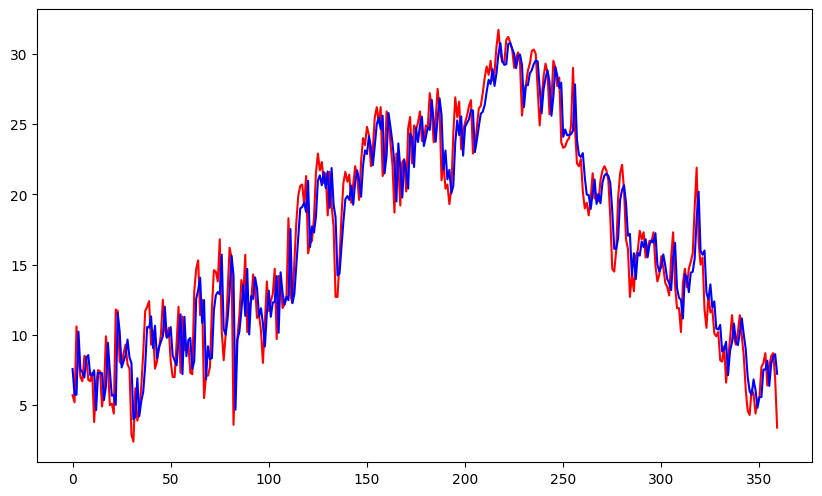

In [10]:
#回帰分析で明日の気温を予測する
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("kion10y_renshu.csv", encoding="utf-8")

train_year = (df["年"]<=2019)
test_year = (df["年"]>=2020)
interval = 6

#過去6日分のデータ学習するデータを作成
def make_data(data):
    x = [] #学習データ
    y= [] #結果
    temps = list(data[" 気温"])
    for i in range(len(temps)):
        if i < interval:continue
        y.append(temps[i])
        xa = []
        for p in range(interval):
            d = i + p - interval
            xa.append(temps[d])
        x.append(xa)
    return(x,y)

train_x, train_y = make_data(df[train_year])
test_x, test_y = make_data(df[test_year])

#線形回帰分析を行う
lr = LinearRegression(normalize=True)
lr.fit(train_x, train_y) 
pre_y = lr.predict(test_x)

#結果を図にプロット
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(test_y, c='r')
plt.plot(pre_y, c='b')
plt.savefig('tenki-kionrenshu-ir.png')
plt.show()